In [1]:
import sys
import pandas as pd

sys.path.insert(1, '../')


import pandas as pd

from tsad.base.pipeline import Pipeline
from tsad.tasks.eda import HighLevelDatasetAnalysisTask, TimeDiscretizationTask
from tsad.tasks.eda import FindNaNTask, EquipmentDowntimeTask
from tsad.tasks.preprocess import ScalingTask, ValueRangeProcessingTask, ResampleProcessingTask 
from tsad.tasks.preprocess import FeatureProcessingTask, SplitByNaNTask, PrepareSeqSamplesTask
from tsad.tasks.deep_learning_anomaly_detection import ResidualAnomalyDetectionTask
from tsad.tasks.deep_learning_forecasting import DeepLeaningTimeSeriesForecastingTask

from tsad.base.datasets import load_skab


In [2]:
dataset = load_skab()
columns = dataset.feature_names
targets = dataset.target_names
df = dataset.frame

In [3]:
df.index.levels[0]

Index(['air/0', 'air/1', 'fluid/0', 'fluid/1', 'fluid/2', 'fluid/3', 'fluid/4',
       'fluid/5', 'rotor/0', 'rotor/1', 'rotor/2', 'rotor/3', 'rotor/4',
       'temperature/0', 'valve1/0', 'valve1/1', 'valve1/10', 'valve1/11',
       'valve1/12', 'valve1/13', 'valve1/14', 'valve1/15', 'valve1/2',
       'valve1/3', 'valve1/4', 'valve1/5', 'valve1/6', 'valve1/7', 'valve1/8',
       'valve1/9', 'valve2/0', 'valve2/1', 'valve2/2', 'valve2/3'],
      dtype='object', name='experiment')

In [4]:
test_datasets = ['valve1/0', 'valve2/0', 'fluid/0']
train = df.drop(test_datasets,level=0).droplevel(level=0)
test = df.loc[test_datasets].droplevel(level=0)

In [5]:
%%time
fit_pipeline = Pipeline([
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(freq_tobe_approach='custom',FREQ_TOBE='1s'),# freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask(),
    ResampleProcessingTask(),
    FeatureProcessingTask(),
    SplitByNaNTask(),
#     PrepareSeqSamplesTask(len_seq=10), Тут раскоментируй Олег
], show=False)
train = fit_pipeline.fit(train)



# df

None
1s
CPU times: user 852 ms, sys: 203 ms, total: 1.05 s
Wall time: 1.05 s


In [6]:
inference_pipeline = Pipeline([
    HighLevelDatasetAnalysisTask(),
    TimeDiscretizationTask(freq_tobe_approach='custom',FREQ_TOBE='1s'),# freq_tobe='1s'),
    FindNaNTask(),
    EquipmentDowntimeTask(),
    ResampleProcessingTask(),
    FeatureProcessingTask(),
    SplitByNaNTask(),
#     PrepareSeqSamplesTask(len_seq=10),
], show=False)
test = inference_pipeline.fit(test)

None
1s


In [7]:
task = PrepareSeqSamplesTask(len_seq=10)
(X_train, _, y_train, _) , _ = task.fit(train)

task = PrepareSeqSamplesTask(len_seq=10)
(_, X_test, _, y_test), _ = task.fit(test)

dfs = [X_train,X_test,y_train,y_test]

Пропущено 102 датастов, из-за того что saples слишком малов в датасете. (len_seq + points_ahead + gap -1 <= len(df))
Пропущено 5 датастов, из-за того что saples слишком малов в датасете. (len_seq + points_ahead + gap -1 <= len(df))


In [8]:
task = ResidualAnomalyDetectionTask()

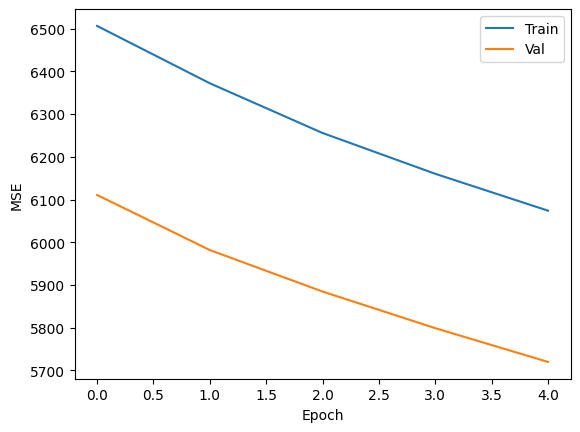

Epoch: 05 
	Train Loss: 6073.866 
	 Val. Loss: 5719.727 

Epoch: 04 
	Train Loss: 6160.178 
	 Val. Loss: 5798.749 

Epoch: 03 
	Train Loss: 6255.710 
	 Val. Loss: 5884.492 

Epoch: 02 
	Train Loss: 6372.125 
	 Val. Loss: 5981.666 

Epoch: 01 
	Train Loss: 6506.401 
	 Val. Loss: 6110.657 


After choosing the best model:
Test Loss: 5760.098
asdasdas 4
(11707, 1, 10) (11707, 1, 10)


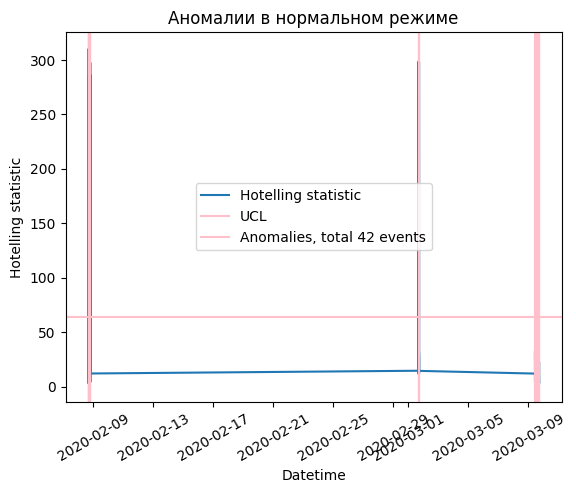

(                     0
 0  2020-02-08 16:39:00
 1  2020-02-08 16:43:08
 2  2020-02-08 16:44:10
 3  2020-02-08 17:03:14
 4  2020-02-08 17:24:14
 5  2020-02-08 17:44:19
 6  2020-02-08 17:58:38
 7  2020-02-08 18:08:03
 8  2020-02-08 18:28:37
 9  2020-02-08 18:57:29
 10 2020-02-08 18:57:33
 11 2020-02-08 19:26:37
 12 2020-02-08 19:31:46
 13 2020-03-01 16:34:52
 14 2020-03-01 16:39:52
 15 2020-03-01 16:54:53
 16 2020-03-01 17:13:53
 17 2020-03-09 10:50:33
 18 2020-03-09 10:51:34
 19 2020-03-09 11:31:36
 20 2020-03-09 11:50:36
 21 2020-03-09 12:04:36
 22 2020-03-09 12:05:36
 23 2020-03-09 12:24:36
 24 2020-03-09 12:25:36
 25 2020-03-09 12:44:37
 26 2020-03-09 12:50:37
 27 2020-03-09 12:51:38
 28 2020-03-09 13:04:38
 29 2020-03-09 13:10:38
 30 2020-03-09 13:24:38
 31 2020-03-09 13:31:39
 32 2020-03-09 14:05:40
 33 2020-03-09 14:25:40
 34 2020-03-09 14:44:41
 35 2020-03-09 14:51:41
 36 2020-03-09 15:24:41
 37 2020-03-09 15:31:42
 38 2020-03-09 16:26:30
 39 2020-03-09 16:27:30
 40 2020-03-09 1

In [9]:
task.fit(dfs,result_base_eda=fit_pipeline.results[0])

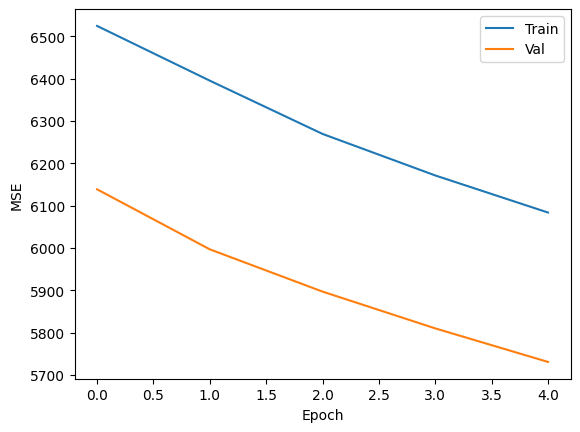

Epoch: 05 
	Train Loss: 6083.952 
	 Val. Loss: 5730.907 

Epoch: 04 
	Train Loss: 6171.584 
	 Val. Loss: 5810.141 

Epoch: 03 
	Train Loss: 6269.739 
	 Val. Loss: 5897.078 

Epoch: 02 
	Train Loss: 6395.580 
	 Val. Loss: 5996.958 

Epoch: 01 
	Train Loss: 6524.946 
	 Val. Loss: 6138.861 


After choosing the best model:
Test Loss: 5770.700


(array([[[ 2.2136703e-02,  2.9314447e-02,  1.3195853e+00, ...,
           4.7365880e+00,  3.5467136e-01, -2.6919544e-03]],
 
        [[ 2.2274986e-02,  2.9329915e-02,  1.3263899e+00, ...,
           4.7632117e+00,  3.5524094e-01, -4.2403638e-03]],
 
        [[ 2.2291049e-02,  2.9312436e-02,  1.3273928e+00, ...,
           4.7671247e+00,  3.5530466e-01, -4.4439733e-03]],
 
        ...,
 
        [[ 2.2292078e-02,  2.9302377e-02,  1.3275695e+00, ...,
           4.7678089e+00,  3.5530967e-01, -4.4724047e-03]],
 
        [[ 2.2292078e-02,  2.9302198e-02,  1.3275702e+00, ...,
           4.7678118e+00,  3.5530955e-01, -4.4724047e-03]],
 
        [[ 2.2292078e-02,  2.9302198e-02,  1.3275702e+00, ...,
           4.7678127e+00,  3.5530955e-01, -4.4724047e-03]]], dtype=float32),
 <tsad.tasks.deep_learning_forecasting.DeepLeaningTimeSeriesForecastingResult at 0x13873ed70>)

In [10]:
task = DeepLeaningTimeSeriesForecastingTask()
task.fit(dfs,result_base_eda=fit_pipeline.results[0])